#### Используем набор примеров fashion-MNIST

### 1. Опишите - какой результата получен в нейросети в зависимости от:
- числа нейронов в слое(для 2-хслойной сети),
- числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
- фиксируйте для тренировочного и тестового набора метрики accuracy.

In [1]:
from keras.datasets import fashion_mnist

import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
(train_imagesi,train_labels),(test_imagesi,testn_labels)=fashion_mnist.load_data()

In [3]:
# Normalize the images.
train_imagesi = (train_imagesi / 127) - 1
test_imagesi = (test_imagesi / 127) - 1

# Flatten the images.
train_images = train_imagesi.reshape((-1, 784))
test_images = test_imagesi.reshape((-1, 784))

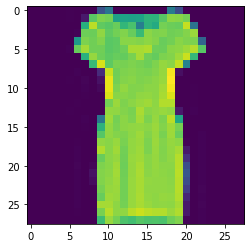

3


In [4]:
n = 20
plt.imshow(train_imagesi[n,:,:])
plt.show()
print(train_labels[n])

In [5]:
y_t = to_categorical(train_labels)

In [6]:
model1 = Sequential(name='my_model')
model1.add(Dense(128, activation='relu', input_shape=(784,)))
model1.add(Dense(10, activation='softmax'))

In [7]:
model1.compile(
  optimizer='adam',
  loss=keras.losses.CategoricalCrossentropy(),
  metrics=['accuracy'],
)

In [8]:
model1.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
hh = model1.fit(
    train_images,
    y_t,
    epochs=2,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4995 - accuracy: 0.8192 - val_loss: 0.4160 - val_accuracy: 0.8461
Epoch 2/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3816 - accuracy: 0.8611 - val_loss: 0.3859 - val_accuracy: 0.8586


In [10]:
# Predict on the first 5 test images.
predictions = model1.predict(test_images[:5])

# Print our model's predictions.
preds_max = np.argmax(predictions, axis=1)
print(preds_max)

# Check our predictions against the ground truths.
print(testn_labels[:5])

[9 2 1 1 6]
[9 2 1 1 6]


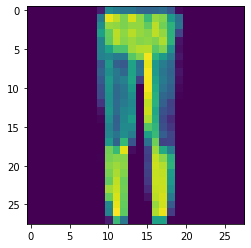

1


In [11]:
n = 3
plt.imshow(test_imagesi[n,:,:])
plt.show()
print(preds_max[n])

In [12]:
def print_hh(hh):
    plt.figure(figsize=(15,7))
    plt.plot(hh.history['loss'], label = 'потери для тренировки')
    plt.plot(hh.history['val_loss'], label = 'потери для валидации')
    plt.xlabel('эпох')
    plt.ylabel('loss')
    plt.legend()
    plt.grid('On')
    plt.title('потери от эпох')
    plt.show()

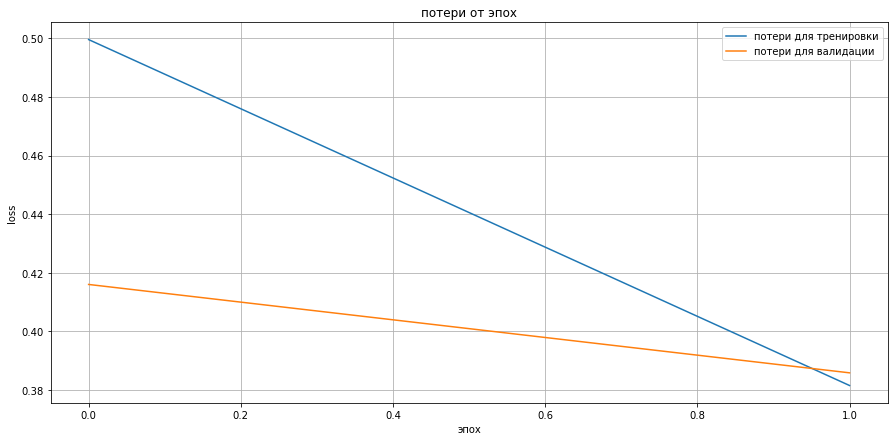

In [13]:
print_hh(hh)

#### 2 слоя, 128 нейронов

In [14]:
hh.history.get('accuracy')[-1], hh.history.get('val_accuracy')[-1]

(0.8610833287239075, 0.8585833311080933)

#### 2 слоя, 256 нейронов

In [21]:
model1 = Sequential(name='my_model')
model1.add(Dense(256, activation='relu', input_shape=(784,)))
model1.add(Dense(10, activation='softmax'))

model1.compile(
  optimizer='adam',
  loss=keras.losses.CategoricalCrossentropy(),
  metrics=['accuracy'],
)

hh = model1.fit(
    train_images,
    y_t,
    epochs=2,
    batch_size=32,
    validation_split=0.2
)

hh.history.get('accuracy')[-1], hh.history.get('val_accuracy')[-1]

Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4972 - accuracy: 0.8193 - val_loss: 0.4171 - val_accuracy: 0.8461
Epoch 2/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3789 - accuracy: 0.8608 - val_loss: 0.3651 - val_accuracy: 0.8713


(0.8608124852180481, 0.8713333606719971)

#### 2 слоя, 512 нейронов

In [26]:
model1 = Sequential(name='my_model')
model1.add(Dense(512, activation='relu', input_shape=(784,)))
model1.add(Dense(10, activation='softmax'))

model1.compile(
  optimizer='adam',
  loss=keras.losses.CategoricalCrossentropy(),
  metrics=['accuracy'],
)

hh = model1.fit(
    train_images,
    y_t,
    epochs=2,
    batch_size=32,
    validation_split=0.2
)

hh.history.get('accuracy')[-1], hh.history.get('val_accuracy')[-1]

Epoch 1/2
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4895 - accuracy: 0.8218 - val_loss: 0.4306 - val_accuracy: 0.8444
Epoch 2/2
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3798 - accuracy: 0.8604 - val_loss: 0.3746 - val_accuracy: 0.8624


(0.8603958487510681, 0.862416684627533)

#### 2 слоя, 16 нейронов

In [31]:
model1 = Sequential(name='my_model')
model1.add(Dense(16, activation='relu', input_shape=(784,)))
model1.add(Dense(10, activation='softmax'))

model1.compile(
  optimizer='adam',
  loss=keras.losses.CategoricalCrossentropy(),
  metrics=['accuracy'],
)

hh = model1.fit(
    train_images,
    y_t,
    epochs=2,
    batch_size=32,
    validation_split=0.2
)

hh.history.get('accuracy')[-1], hh.history.get('val_accuracy')[-1]

Epoch 1/2
1500/1500 [==============================] - 2s 997us/step - loss: 0.5884 - accuracy: 0.7921 - val_loss: 0.4810 - val_accuracy: 0.8282
Epoch 2/2
1500/1500 [==============================] - 1s 928us/step - loss: 0.4540 - accuracy: 0.8394 - val_loss: 0.4486 - val_accuracy: 0.8399


(0.8393541574478149, 0.8399166464805603)

#### Вывод: Изменения количества нейронов особой роли не играет.

#### 2 layers / Total params: 101,770

In [45]:
model1 = Sequential(name='my_model')
model1.add(Dense(128, activation='relu', input_shape=(784,)))
model1.add(Dense(10, activation='softmax'))
model1.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 128)               100480    
                                                                 
 dense_60 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [50]:
model1.compile(
  optimizer='adam',
  loss=keras.losses.CategoricalCrossentropy(),
  metrics=['accuracy'],
)

hh = model1.fit(
    train_images,
    y_t,
    epochs=2,
    batch_size=32,
    validation_split=0.2
)

hh.history.get('accuracy')[-1], hh.history.get('val_accuracy')[-1]

Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2551 - accuracy: 0.9046 - val_loss: 0.3458 - val_accuracy: 0.8802
Epoch 2/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2427 - accuracy: 0.9099 - val_loss: 0.3479 - val_accuracy: 0.8832


(0.9098958373069763, 0.8831666707992554)

#### 3 layers / Total params: 101,706

In [53]:
model1 = Sequential(name='my_model')
model1.add(Dense(112, activation='relu', input_shape=(784,)))
model1.add(Dense(112, activation='tanh'))
model1.add(Dense(10, activation='softmax'))
model1.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_67 (Dense)            (None, 112)               87920     
                                                                 
 dense_68 (Dense)            (None, 112)               12656     
                                                                 
 dense_69 (Dense)            (None, 10)                1130      
                                                                 
Total params: 101,706
Trainable params: 101,706
Non-trainable params: 0
_________________________________________________________________


In [58]:
model1.compile(
  optimizer='adam',
  loss=keras.losses.CategoricalCrossentropy(),
  metrics=['accuracy'],
)

hh = model1.fit(
    train_images,
    y_t,
    epochs=2,
    batch_size=32,
    validation_split=0.2
)

hh.history.get('accuracy')[-1], hh.history.get('val_accuracy')[-1]

Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2501 - accuracy: 0.9070 - val_loss: 0.3242 - val_accuracy: 0.8859
Epoch 2/2
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2400 - accuracy: 0.9102 - val_loss: 0.3225 - val_accuracy: 0.8846


(0.9101666808128357, 0.8845833539962769)

#### 5 layers / Total params: 101,944

In [66]:
model1 = Sequential(name='my_model')
model1.add(Dense(100, activation='relu', input_shape=(784,)))
for k in range(3):
    model1.add(Dense(10+(10-k)*8, activation='tanh')) 
model1.add(Dense(10, activation='softmax'))
model1.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_101 (Dense)           (None, 100)               78500     
                                                                 
 dense_102 (Dense)           (None, 90)                9090      
                                                                 
 dense_103 (Dense)           (None, 82)                7462      
                                                                 
 dense_104 (Dense)           (None, 74)                6142      
                                                                 
 dense_105 (Dense)           (None, 10)                750       
                                                                 
Total params: 101,944
Trainable params: 101,944
Non-trainable params: 0
_________________________________________________________________


In [71]:
model1.compile(
  optimizer='adam',
  loss=keras.losses.CategoricalCrossentropy(),
  metrics=['accuracy'],
)

hh = model1.fit(
    train_images,
    y_t,
    epochs=2,
    batch_size=32,
    validation_split=0.2
)

hh.history.get('accuracy')[-1], hh.history.get('val_accuracy')[-1]

Epoch 1/2
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2700 - accuracy: 0.8992 - val_loss: 0.3318 - val_accuracy: 0.8819
Epoch 2/2
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2603 - accuracy: 0.9029 - val_loss: 0.3379 - val_accuracy: 0.8798


(0.9028958082199097, 0.8797500133514404)

#### 10 layers / Total params: 101,780

In [79]:
model1 = Sequential(name='my_model')
model1.add(Dense(104, activation='relu', input_shape=(784,)))
for k in range(8):
    model1.add(Dense(10+(10-k)*5, activation='tanh')) 
model1.add(Dense(10, activation='softmax'))
model1.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_176 (Dense)           (None, 104)               81640     
                                                                 
 dense_177 (Dense)           (None, 60)                6300      
                                                                 
 dense_178 (Dense)           (None, 55)                3355      
                                                                 
 dense_179 (Dense)           (None, 50)                2800      
                                                                 
 dense_180 (Dense)           (None, 45)                2295      
                                                                 
 dense_181 (Dense)           (None, 40)                1840      
                                                                 
 dense_182 (Dense)           (None, 35)                143

In [83]:
model1.compile(
  optimizer='adam',
  loss=keras.losses.CategoricalCrossentropy(),
  metrics=['accuracy'],
)

hh = model1.fit(
    train_images,
    y_t,
    epochs=2,
    batch_size=32,
    validation_split=0.2
)

hh.history.get('accuracy')[-1], hh.history.get('val_accuracy')[-1]

Epoch 1/2
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3307 - accuracy: 0.8812 - val_loss: 0.3748 - val_accuracy: 0.8681
Epoch 2/2
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3172 - accuracy: 0.8862 - val_loss: 0.4346 - val_accuracy: 0.8577


(0.8862083554267883, 0.8576666712760925)

#### Вывод:
При количестве эпох = 2, изменение количества слоёв и нейронов на метрике особо не отражается.

### Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

In [85]:
for optimizer in ['SGD', 'Adam', 'RMSProp']:
    model1 = Sequential(name='my_model')
    model1.add(Dense(128, activation='relu', input_shape=(784,)))
    model1.add(Dense(10, activation='softmax'))

    model1.compile(
      optimizer=optimizer,
      loss=keras.losses.CategoricalCrossentropy(),
      metrics=['accuracy'],
    )

    hh = model1.fit(
        train_images,
        y_t,
        epochs=5,
        batch_size=32,
        validation_split=0.2
    )

    print(hh.history.get('accuracy')[-1], hh.history.get('val_accuracy')[-1])

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6188 - accuracy: 0.7859 - val_loss: 0.4849 - val_accuracy: 0.8287
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4569 - accuracy: 0.8391 - val_loss: 0.4361 - val_accuracy: 0.8439
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4206 - accuracy: 0.8513 - val_loss: 0.4145 - val_accuracy: 0.8545
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3964 - accuracy: 0.8602 - val_loss: 0.4012 - val_accuracy: 0.8572
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3791 - accuracy: 0.8651 - val_loss: 0.3944 - val_accuracy: 0.8608
0.8650833368301392 0.8608333468437195
Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4986 - accuracy: 0.8209 - val_loss: 0.4079 - val_accuracy: 0.8539
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3838 - accuracy: 0.8611 - v

- 0.8650833368301392 0.8608333468437195
- 0.8877708315849304 0.8727499842643738
- 0.8845833539962769 0.8739166855812073

#### Вывод:
При количестве эпох = 5 и 2-х слоях чуть лучше работают 'Adam' и 'RMSProp' оптимизации.

### 3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

In [95]:
model1 = Sequential(name='my_model')
model1.add(Dense(512, activation='relu', input_shape=(784,)))
for k in range(10):
    model1.add(Dense(10+(10-k)*10, activation='tanh')) 
model1.add(Dense(10, activation='softmax'))
model1.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_268 (Dense)           (None, 512)               401920    
                                                                 
 dense_269 (Dense)           (None, 110)               56430     
                                                                 
 dense_270 (Dense)           (None, 100)               11100     
                                                                 
 dense_271 (Dense)           (None, 90)                9090      
                                                                 
 dense_272 (Dense)           (None, 80)                7280      
                                                                 
 dense_273 (Dense)           (None, 70)                5670      
                                                                 
 dense_274 (Dense)           (None, 60)                426

In [98]:
model1.compile(
    optimizer='RMSProp',
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy'],
)

hh = model1.fit(
    train_images,
    y_t,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3976 - accuracy: 0.8639 - val_loss: 0.4416 - val_accuracy: 0.8547
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3878 - accuracy: 0.8671 - val_loss: 0.3951 - val_accuracy: 0.8633
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3812 - accuracy: 0.8700 - val_loss: 0.4581 - val_accuracy: 0.8463
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3871 - accuracy: 0.8689 - val_loss: 0.4267 - val_accuracy: 0.8583
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3882 - accuracy: 0.8680 - val_loss: 0.4328 - val_accuracy: 0.8586
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3843 - accuracy: 0.8691 - val_loss: 0.4067 - val_accuracy: 0.8664
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3816 - accuracy: 0.8718 - val_loss: 0.4401 - val_accuracy:

In [97]:
hh.history.get('accuracy')[-1], hh.history.get('val_accuracy')[-1]

(0.8659999966621399, 0.859250009059906)

### Вывод:  Изменение параметров на метрике особо не сказалось. При увеличении параметров сеть переобучается.

### 4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.

In [100]:
predictions = model1.predict(test_images)

In [109]:
from sklearn.metrics import confusion_matrix, classification_report

In [106]:
cm = confusion_matrix(testn_labels, predictions.argmax(axis=1))

In [107]:
cm.shape

(10, 10)

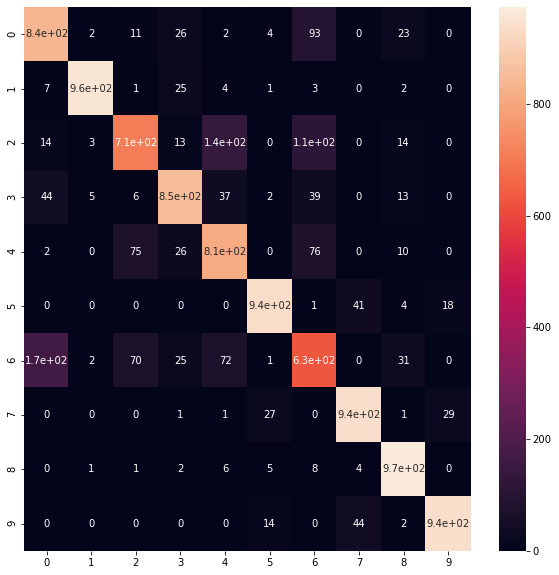

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

cm = pd.DataFrame(cm, range(10),range(10))
plt.figure(figsize = (10,10))

sns.heatmap(cm, annot=True)
plt.show()

In [112]:
print(classification_report(testn_labels, predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1000
           1       0.99      0.96      0.97      1000
           2       0.81      0.71      0.76      1000
           3       0.88      0.85      0.87      1000
           4       0.76      0.81      0.78      1000
           5       0.95      0.94      0.94      1000
           6       0.65      0.63      0.64      1000
           7       0.91      0.94      0.93      1000
           8       0.91      0.97      0.94      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



### Вывод: По f1-score видно, что сеть плохо справляется с классом 6.

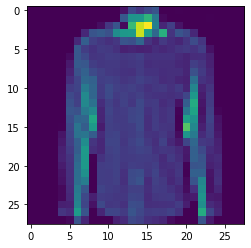

6


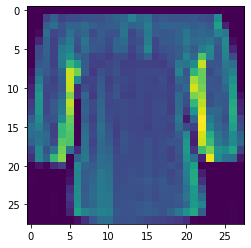

6


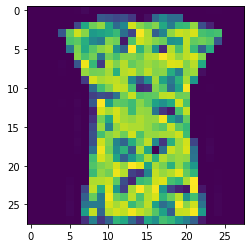

6


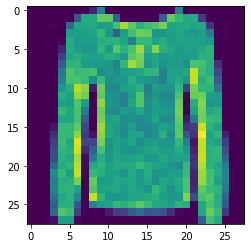

6


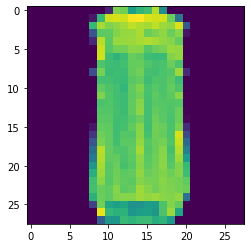

6


In [135]:
ind=np.where(testn_labels==6)[0]
for n in np.random.choice(ind, size=5):
    plt.imshow(test_imagesi[n,:,:])
    plt.show()
    print(testn_labels[n])

Для сравнения - класс 9. Картинки более похожие.

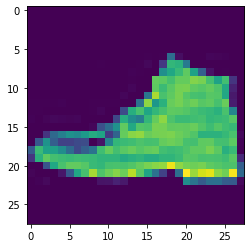

9


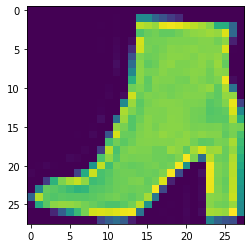

9


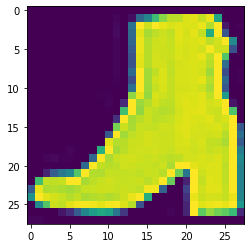

9


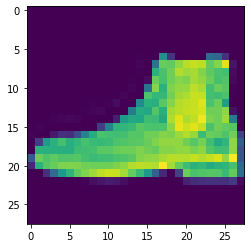

9


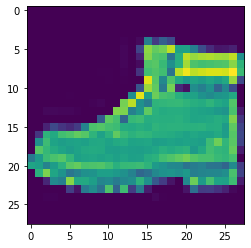

9


In [136]:
ind=np.where(testn_labels==9)[0]
for n in np.random.choice(ind, size=5):
    plt.imshow(test_imagesi[n,:,:])
    plt.show()
    print(testn_labels[n])